In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys

In [13]:
os.chdir(os.environ['HOME']+'/work/neuro-boa/apps/spring/calibration/')

In [192]:
print "Calling python script to get basic calibration parameters"
if os.path.exists('basicCalibrationParams.py'):
    execfile('basicCalibrationParams.py')
elif os.path.exists('calibration/basicCalibrationParams.py'):
    execfile('calibration/basicCalibrationParams.py')
elif os.path.exists('../calibration/basicCalibrationParams.py'):
    execfile('../calibration/basicCalibrationParams.py')
else:
    print 'ERROR: Cannot find basicCalibrationParams.py'
    time.sleep(1)
    sys.exit()
print "Called python script to get basic calibration parameters"

print "board_id: " + str(board_id) + "\tchip_id: " + str(chip_id) + "\trun_id: " + str(run_id) + "\tsyn_idx: " + str(syn_idx)
print "block_size: " + str(block_size) + "\toffset: " + str(offset)
print "home: " + str(home) + "\tfolder_root: " + str(folder_root)

Calling python script to get basic calibration parameters
Using Chip Params from:
	/home/noza/data/calibData/endeavour/chip3/run8.9/packed_data/chipParam.pck
Called python script to get basic calibration parameters
board_id: endeavour	chip_id: 3	run_id: 8.9	syn_idx: 0
block_size: 256	offset: 0
home: /home/noza	folder_root: /home/noza/data/calibData/endeavour/chip3/run8.9
Called python script to get basic calibration parameters
board_id: endeavour	chip_id: 3	run_id: 8.9	syn_idx: 0
block_size: 256	offset: 0
home: /home/noza	folder_root: /home/noza/data/calibData/endeavour/chip3/run8.9


In [95]:
def getpVals():
    # Unpack all the pVal files so that we can get and set the pVals accordingly for individual neurons
    #    The pVal data structures are organized as dictionaries, where the key is neuron_id and the corresponding value is the pVal for that neuron
    pqua_pck_file = folder_root + '/packed_data/pquaValues_' + board_id + '_chip'+ str(chip_id) + '.pck'
    if os.path.exists(pqua_pck_file):
        if debug:
            print "Using calibrated p_qua packed file during soma validation"
            print "\t", pqua_pck_file
        pquas = cPickle.load(open(pqua_pck_file))

    ptau_pck_file = folder_root + '/packed_data/ptauValues_' + board_id + '_chip'+ str(chip_id) + '.pck'
    if os.path.exists(ptau_pck_file):
        if debug:
            print "Using calibrated p_tau packed file during soma validation"
            print "\t", ptau_pck_file
        ptaus = cPickle.load(open(ptau_pck_file))

    pilkr_pck_file = folder_root + '/packed_data/pilkrValues_' + board_id + '_chip'+ str(chip_id) + '.pck'
    if os.path.exists(pilkr_pck_file):
        if debug:
            print "Using calibrated p_ilkr packed file during soma validation"
            print "\t", pilkr_pck_file
        pilkrs = cPickle.load(open(pilkr_pck_file))

    pref1_pck_file = folder_root + '/packed_data/pref1Values_' + board_id + '_chip'+ str(chip_id) + '.pck'
    if os.path.exists(pref1_pck_file):
        if debug:
            print "Using calibrated p_ref1 packed file during soma validation"
            print "\t", pref1_pck_file
        pref1s = cPickle.load(open(pref1_pck_file))

    pref2_pck_file = folder_root + '/packed_data/pref2Values_' + board_id + '_chip'+ str(chip_id) + '.pck'
    if os.path.exists(pref2_pck_file):
        if debug:
            print "Using calibrated p_ref2 packed file during soma validation"
            print "\t", pref2_pck_file
        pref2s = cPickle.load(open(pref2_pck_file))

    return pquas, ptaus, pilkrs, pref1s, pref2s

def getSweepVals():
    sweep_pck_file = folder_root + '/packed_data/sweepList.pck'
    if os.path.exists(sweep_pck_file):
        if debug:
            print "Getting Sweep Lists used during calibration"
            print "\t", sweep_pck_file
        sweeps = cPickle.load(open(sweep_pck_file))
        
        return sweeps

def getbifVals(Ir_list):
    # Unpack all the pVal files so that we can get and set the pVals accordingly for individual neurons
    #    The pVal data structures are organized as dictionaries, where the key is neuron_id and the corresponding value is the pVal for that neuron
    bifs = dict()
    for Ir in Ir_list:
        bif_prefix = folder_root + '/packed_data/bifPoints_' + board_id + '_chip'+ str(chip_id)
        bif_pck_file =  bif_prefix + '_Ir' + str('%0.3f'%Ir) + '.pck'
        if os.path.exists(bif_pck_file):
            if debug:
                print "Getting bifurcation points gotten during calibration"
                print "\t", bif_pck_file
            bifs[Ir] = cPickle.load(open(bif_pck_file))
    return bifs

In [174]:
# Toggle print statements
debug = False

# Get the values necessary to plot the bifurcation points
pquas, ptaus, pilkrs, pref1s, pref2s = getpVals()
Iins, Ilks, Irs = getSweepVals()
bifs = getbifVals(Irs)

print 'Iins Range:\t[', min(Iins), ',', max(Iins), ']'
print 'Ilks:\t', Ilks
print 'Irs:\t', [str('%0.3f'%Ir) for Ir in Irs]

bifMin = dict()
bifMax = dict()
Ys_Min = ones(len(singleNrns)) * max(Iins)
Ys_Max = ones(len(singleNrns)) * min(Iins)
numIls = ones(len(singleNrns))

for i, curNrn in enumerate(singleNrns):
    for j, Ir in enumerate(Irs):
        if j==0:
            bifMin[curNrn] = max(Iins)
            bifMax[curNrn] = min(Iins)
#         print curNrn, ':', len(bifs[Ir][curNrn]), '\t[', min(bifs[Ir][curNrn]), ',', max(bifs[Ir][curNrn]), ']'
        if curNrn==28542 and debug:
#             print 'Nrn:', curNrn, '\t', bifs[Ir][curNrn]
            print 'Nrn:', curNrn, '\t[', min(bifs[Ir][curNrn]), ',', max(bifs[Ir][curNrn]), ']'
        bifMin[curNrn] = min(min(bifs[Ir][curNrn]), bifMin[curNrn])
        bifMax[curNrn] = max(max(bifs[Ir][curNrn]), bifMax[curNrn])
        numIls[i] = max(len(bifs[Ir][curNrn]), numIls[i])
    Ys_Min[i] = bifMin[curNrn]
    Ys_Max[i] = bifMax[curNrn]
print 'Ils in plot', numIls
if debug:
    print bifMin
    print bifMax

Iins Range:	[ 0.00101934027101 , 0.1 ]
Ilks:	[ 0.002  0.012  0.022  0.032  0.042  0.052  0.062  0.072  0.082  0.092
  0.102  0.112  0.122  0.132  0.142  0.152  0.162  0.172  0.182  0.192]
Irs:	['3131.217', '2783.860', '2436.502', '2089.145', '1741.787', '1394.430', '1047.072', '699.715', '352.357', '5.000']
Ils in plot [ 13.  20.  17.  20.  20.  16.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  13.  20.  20.]


In the plot below, it should be noted that the range of $I_{in}$ values at which bifurcation occurs is because of the varying $I_{lk}$ values.  At the minimum $I_{in}$, the $I_{lk}$ value is 0.002, while at the maximum the $I_{lk}$ value is whatever was within the range. 

(array([ 0,  2,  5, 17]),)
[ 1  3  6 18]
[ 13.  20.  17.  20.  20.  16.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  13.  20.  20.]


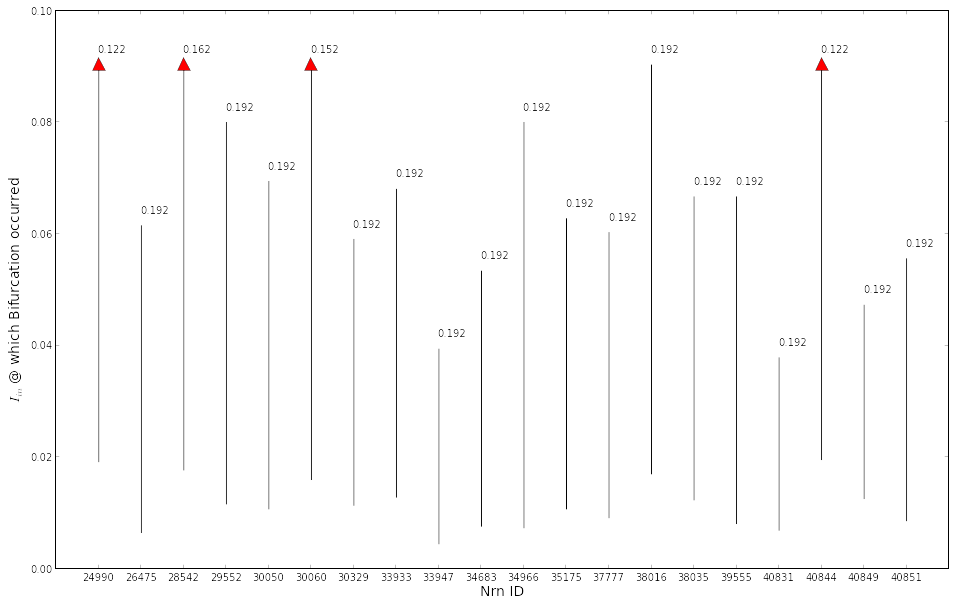

In [190]:
Xs = arange(len(singleNrns)) + 1
mask = where(numIls<20)
print mask

figure(figsize=(16,10))
offset = 0.002
vlines(Xs, Ys_Min, Ys_Max, label=u'hi')
plot(Xs[mask], Ys_Max[mask], 'r', linestyle='', marker='^', markersize=13)
print Xs[mask]
print numIls

for i, IlIdx in enumerate(numIls):
    annotate(Ilks[IlIdx-1], xy=(Xs[i], Ys_Max[i]+offset))
xlim((0,len(singleNrns)+1))
xlabel(r'Nrn ID', fontsize=14)
ylabel(r'$I_{in}$ @ which Bifurcation occurred', fontsize=14)
a, b = xticks(Xs, singleNrns)

In [191]:
print board_id, folder_root, chip_id

endeavour /home/noza/data/calibData/endeavour/chip3/run9.0 3


In [205]:
curPckFile = folder_root + '/packed_data/pquaValues_approx_' + board_id + '_chip'+ str(chip_id) + '.pck'
# curPckFile = '/home/noza/data/oldCalibProcess_calibData/endeavour/chip3/run1.5/packed_data/prefValues_endeavour_chip3.pck'
if os.path.exists(curPckFile):
#     print "Using calibrated p_qua packed file during soma validation"
    print "\t", curPckFile
    pVals = cPickle.load(open(curPckFile))

# print pVals

	/home/noza/data/calibData/endeavour/chip3/run8.9/packed_data/pquaValues_approx_endeavour_chip3.pck


1.70055134319
0.507888483958
0.257950712138


(array([  7,   9,  28,  72, 102, 115, 194, 208, 210, 225, 218, 215, 192,
        138, 186, 151, 157, 153, 164, 154, 152, 138, 130, 142,  99, 104,
         81,  74,  53,  55,  34,  28,  27,  16,  18,   8,   6,  10,   4,
          8,   4,   0,   3,   1,   1,   0,   0,   0,   1,   1]),
 array([ 0.68150838,  0.74669441,  0.81188044,  0.87706646,  0.94225249,
         1.00743852,  1.07262455,  1.13781058,  1.20299661,  1.26818263,
         1.33336866,  1.39855469,  1.46374072,  1.52892675,  1.59411277,
         1.6592988 ,  1.72448483,  1.78967086,  1.85485689,  1.92004291,
         1.98522894,  2.05041497,  2.115601  ,  2.18078703,  2.24597305,
         2.31115908,  2.37634511,  2.44153114,  2.50671717,  2.5719032 ,
         2.63708922,  2.70227525,  2.76746128,  2.83264731,  2.89783334,
         2.96301936,  3.02820539,  3.09339142,  3.15857745,  3.22376348,
         3.2889495 ,  3.35413553,  3.41932156,  3.48450759,  3.54969362,
         3.61487964,  3.68006567,  3.7452517 ,  3.81043773,

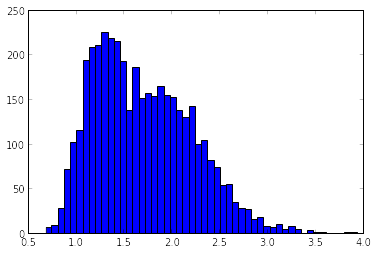

In [206]:
print mean(pVals.values())
print std(pVals.values())
print var(pVals.values())
hist(pVals.values(),50)